In this project,main goal is calculating snowy areas in different geographical places and comparing them.
The snow-covered areas in January for Kuressaare, Estonia; Revelstoke, Canada; and Salzburg, Austria were calculated.

  DATA SOURCE
Sentinel-2 satellite images were used. 
These data were obtained through Copernicus.

The NDSI method using the b03 and b11 bands was used to calculate the snow-covered areas.
Where this method did not yield the desired results, thresholding  was employed

     Why I choosed NDSI for calculating snowy areas?
NDSI is a reliable method for snow detection because snow has high reflectance in
the green band and low reflectance in the shortwave infrared band. This contrast provides a clear distinction in NDSI values.

     Formula for NDSI
NDSI is typically using the green band(G) and the shortwave infrared band(SWIR).
NDSI= G - SWIR / G + SWIR
and I used:
NDSI = B3 - B11 / B3 + B11

      Why I choosed Thresholding for calculating snowy areas?
Thresholding is commonly used to distinguish certain features in an image (for example, objects in the background). It is especially useful for tasks such as object recognition and segmentation. And in this project, it was used to detect snowy areas.

         How it works:
A specific threshold value T is chosen.(For this project we used 0.4)
Each pixel value  I(x,y) in the image is compared to T.

- I(x,y)>T, the pixel is set to white (1).

- I(x,y)≤T, the pixel is set to black (0).




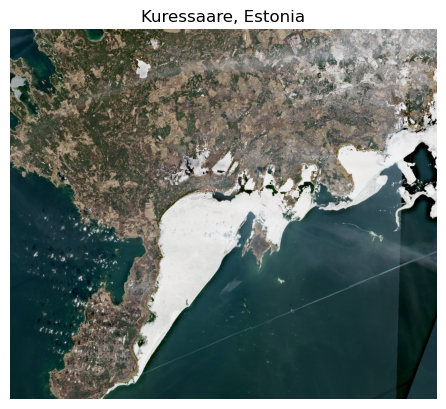

In [37]:
image_path = 'image1.jpg'

image2 = Image.open(image_path)

plt.title('Kuressaare, Estonia')
plt.imshow(image2)
plt.axis('off')  
plt.show()

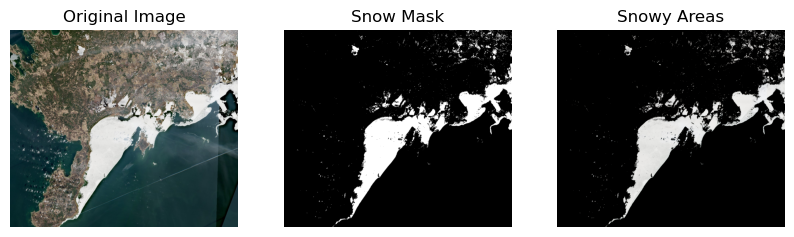

Percentage of snowy areas: 10.71%


In [31]:
#here we use thresholding

import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'image1.jpg'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

lower_white = np.array([200, 200, 200])
upper_white = np.array([255, 255, 255])

mask = cv2.inRange(image_rgb, lower_white, upper_white)

result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Snow Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Snowy Areas')
plt.imshow(result)
plt.axis('off')

plt.show()

snow_pixel_count = np.sum(mask > 0)

total_pixel_count = mask.size

snow_coverage_percentage = (snow_pixel_count / total_pixel_count) * 100

print(f"Percentage of snowy areas: {snow_coverage_percentage:.2f}%")


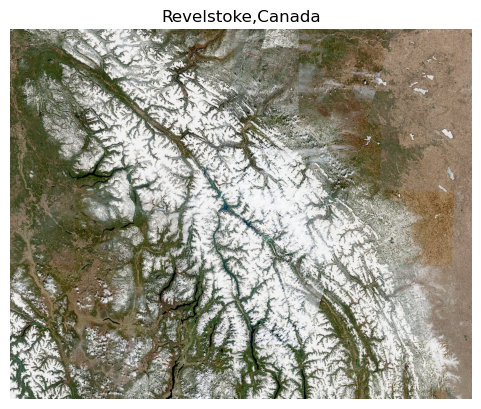

In [3]:
image_path = 'image2.jpg'

image2 = Image.open(image_path)

plt.title('Revelstoke,Canada')
plt.imshow(image2)
plt.axis('off')  
plt.show()

C:\Users\90530\AppData\Local\Temp\ipykernel_25288\3620379541.py:15: RuntimeWarning: invalid value encountered in divide
  ndsi = (green_band_array - nir_band_array) / (green_band_array + nir_band_array)


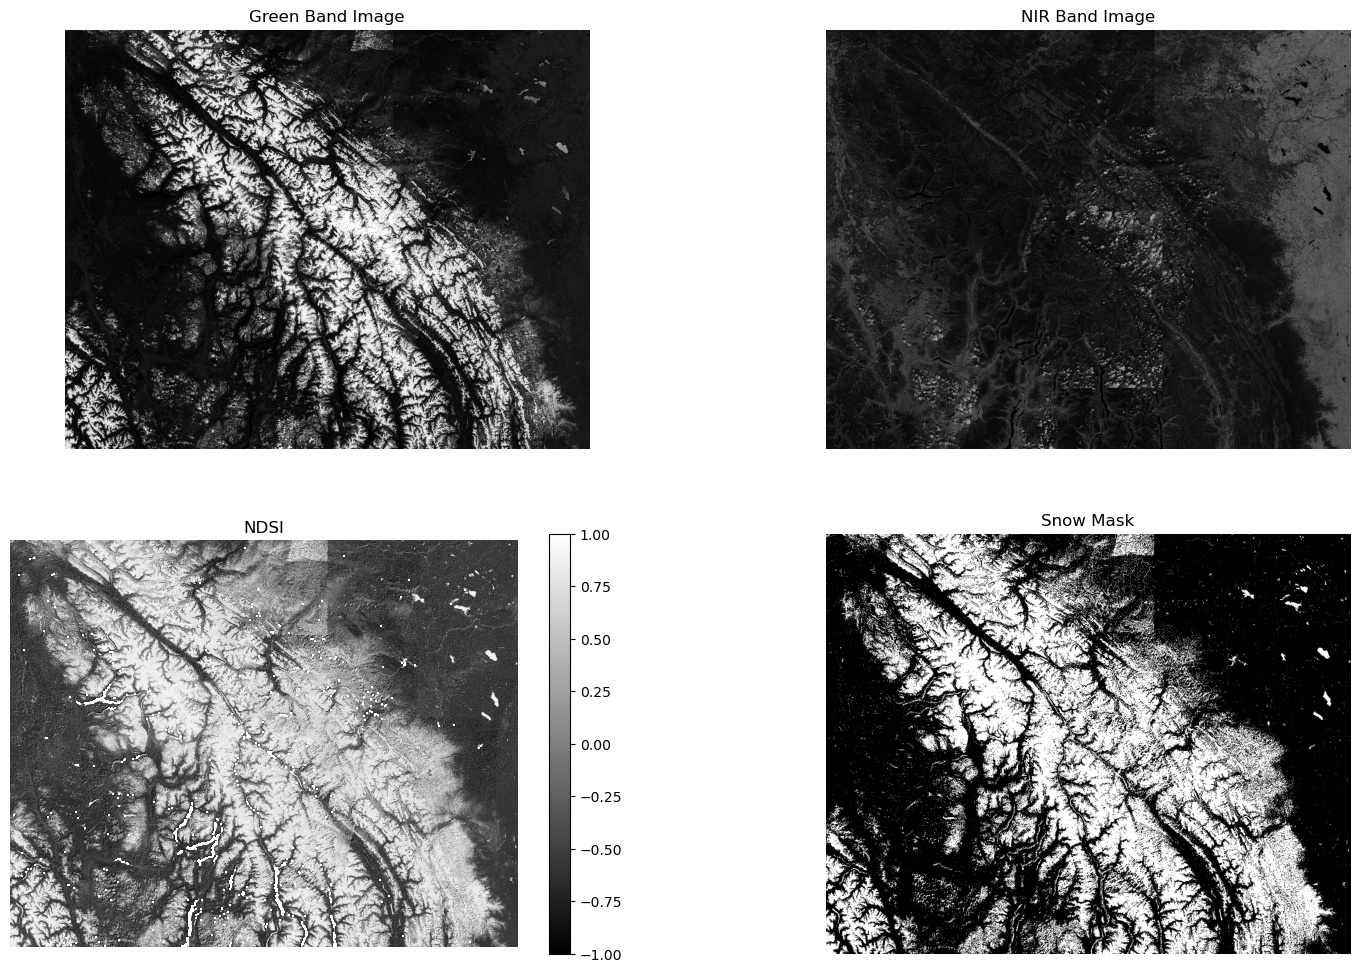

Percentage of snowy areas: 34.79%


In [1]:
#using NDSI with B11 and B03 bands
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

green_band_path = 'image2(b3).jpg'
nir_band_path = 'image2b11.jpg'

green_band_image = Image.open(green_band_path).convert('L')
nir_band_image = Image.open(nir_band_path).convert('L')

green_band_array = np.array(green_band_image, dtype=float)
nir_band_array = np.array(nir_band_image, dtype=float)

ndsi = (green_band_array - nir_band_array) / (green_band_array + nir_band_array)

ndsi_threshold = 0.4  

snow_mask = (ndsi > ndsi_threshold).astype(int)

snow_pixel_count = np.sum(snow_mask)

total_pixel_count = snow_mask.size

snow_coverage_percentage = (snow_pixel_count / total_pixel_count) * 100

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.title('Green Band Image')
plt.imshow(green_band_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('NIR Band Image')
plt.imshow(nir_band_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('NDSI')
plt.imshow(ndsi, cmap='gray')
plt.colorbar()
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Snow Mask')
plt.imshow(snow_mask, cmap='gray')
plt.axis('off')
plt.show()
print(f"Percentage of snowy areas: {snow_coverage_percentage:.2f}%")


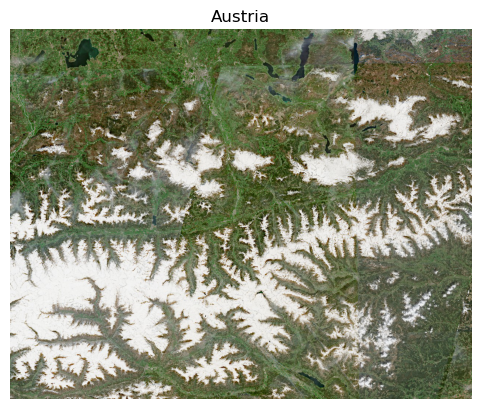

In [35]:
image_path = 'AustriaOriginal.jpg'

image2 = Image.open(image_path)

plt.title('Austria')
plt.imshow(image2)
plt.axis('off')  
plt.show()

C:\Users\90530\AppData\Local\Temp\ipykernel_11620\1069915465.py:15: RuntimeWarning: invalid value encountered in divide
  ndsi = (green_band_array - nir_band_array) / (green_band_array + nir_band_array)


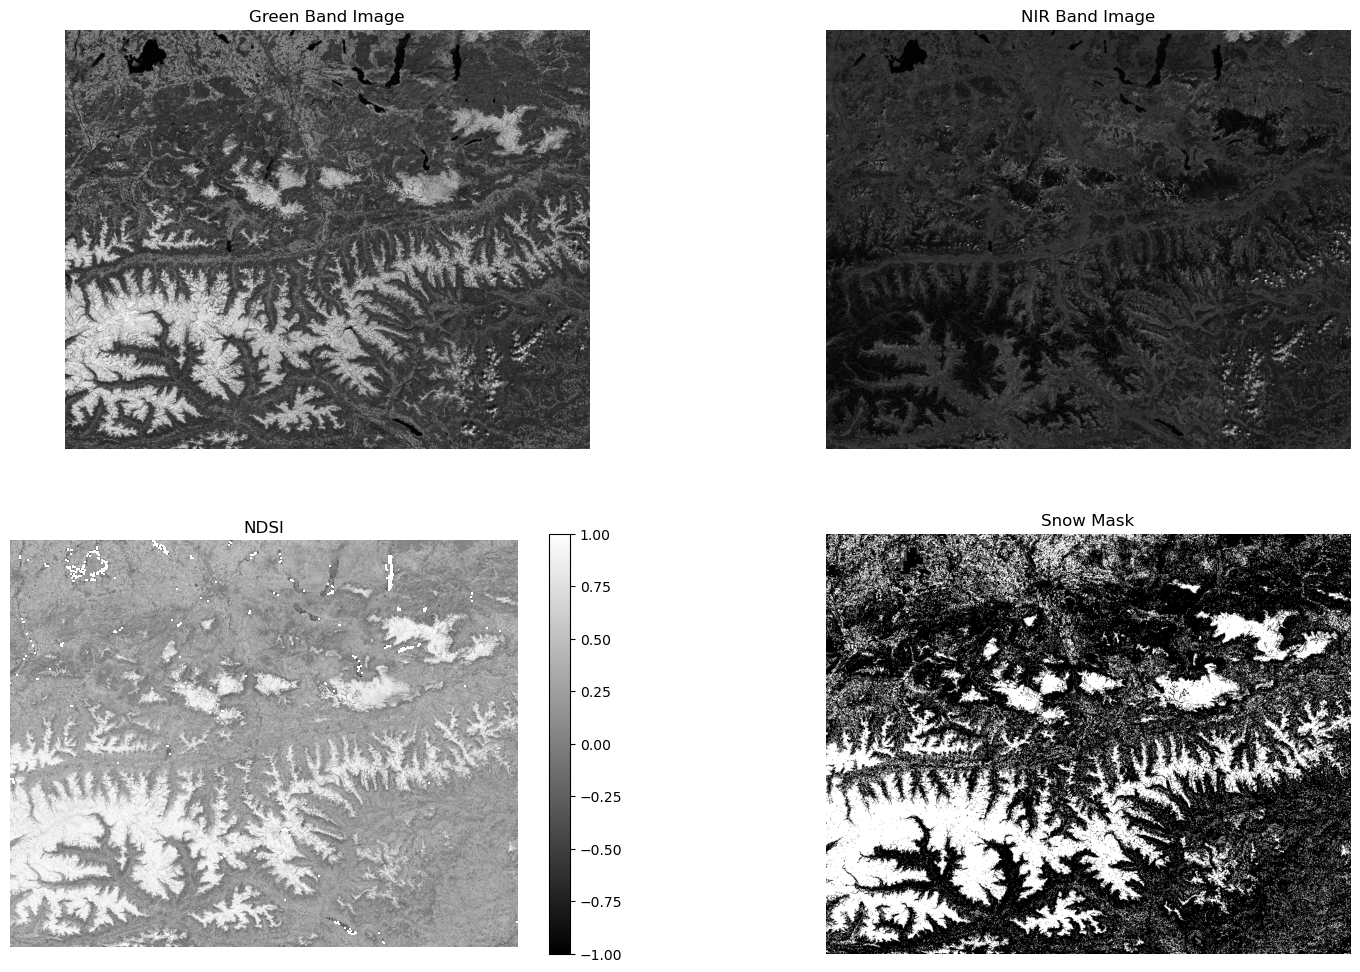

Snowy area percentage: 33.96%


In [3]:
#using NDSI with B11 and B03 bands
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

green_band_path = 'Austriab03.jpg'
nir_band_path = 'Austriab11.jpg'

green_band_image = Image.open(green_band_path).convert('L')
nir_band_image = Image.open(nir_band_path).convert('L')

green_band_array = np.array(green_band_image, dtype=float)
nir_band_array = np.array(nir_band_image, dtype=float)

ndsi = (green_band_array - nir_band_array) / (green_band_array + nir_band_array)

ndsi_threshold = 0.4  

snow_mask = (ndsi > ndsi_threshold).astype(int)

snow_pixel_count = np.sum(snow_mask)

total_pixel_count = snow_mask.size

snow_coverage_percentage = (snow_pixel_count / total_pixel_count) * 100

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.title('Green Band Image')
plt.imshow(green_band_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('NIR Band Image')
plt.imshow(nir_band_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('NDSI')
plt.imshow(ndsi, cmap='gray')
plt.colorbar()
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Snow Mask')
plt.imshow(snow_mask, cmap='gray')
plt.axis('off')
plt.show()
print(f"Snowy area percentage: {snow_coverage_percentage:.2f}%")

'''
As a result, the snow-covered areas in January for Kuressaare (Estonia), Revelstoke (Canada), and Salzburg (Austria) were calculated. 
 The percentage of snow-covered areas is 10.71% in Estonia, 34.79% in Revelstoke, Canada, and 33.96% in Salzburg, Austria.
'''

